In [1]:
#biblioteka tensorflow
# pip install tensorflow

In [2]:
#zaimportuj bibliotekę tensorflow z aliasem tf i wybrane elementy takie jak warstwy, funkcje itd.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#przygotuj zbior - treningowy i walidacyjny/testowy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes


diabetes_dataset = load_diabetes()

data = diabetes_dataset['data']
targets = diabetes_dataset['target']
y_binary = (diabetes_dataset.target > np.mean(diabetes_dataset.target)).astype(int)  # 1 if above average, else 0

X_train, X_test, y_train, y_test = train_test_split(data, y_binary, test_size=.1)
diabetes_dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
#Utwórz przykładowy model sieci neuronowej 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(10,)),  # input shape required
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#skompiluj model i wyświetl go
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae','accuracy']) #algorytm uczenia - adam, funkcja straty - mse, binary_crossentropy 


In [18]:
#naucz sieć i zapisz wyniki uczenia jako historia 
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7914 - loss: 0.4442 - mae: 0.2906 - val_accuracy: 0.7375 - val_loss: 0.5611 - val_mae: 0.3320
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8303 - loss: 0.4255 - mae: 0.2862 - val_accuracy: 0.7375 - val_loss: 0.5615 - val_mae: 0.3312
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8010 - loss: 0.4374 - mae: 0.2832 - val_accuracy: 0.7250 - val_loss: 0.5612 - val_mae: 0.3311
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7881 - loss: 0.4548 - mae: 0.2959 - val_accuracy: 0.7375 - val_loss: 0.5610 - val_mae: 0.3313
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7836 - loss: 0.4899 - mae: 0.3056 - val_accuracy: 0.7375 - val_loss: 0.5622 - val_mae: 0.3316
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7979 - loss: 0.4522 - mae: 0.2977 - val_accuracy: 0.7375 - val_loss: 0.5622 - val_mae: 0.3309
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

In [17]:
#Wyznaczenie metryk dla zbioru walidacyjnego
test_loss, test_accuracy, test_mae = model.evaluate(X_test, y_test)
print("Wartość funkcji straty dla zbioru testowego: "+str(test_loss))
print("Wartość dokladnosci dla zbioru testowego: "+str(test_accuracy))
print("Wartość funkcji MSE dla zbioru testowego: "+str(test_mae))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6127 - loss: 0.6654 - mae: 0.3950 
Wartość funkcji straty dla zbioru testowego: 0.6520750522613525
Wartość dokladnosci dla zbioru testowego: 0.39155009388923645
Wartość funkcji MSE dla zbioru testowego: 0.6222222447395325


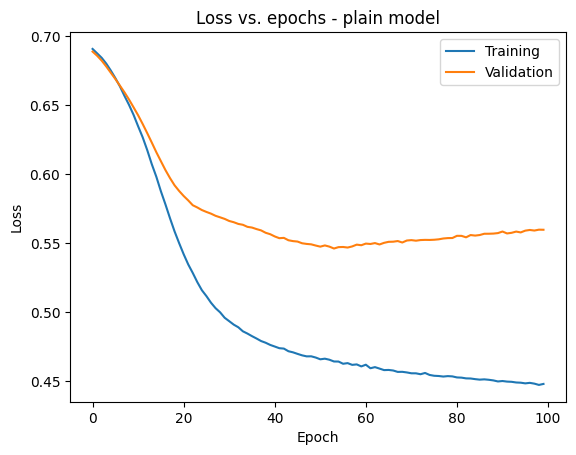

In [11]:
#Wyświetl wykres uczenia - funkcja straty
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs - plain model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

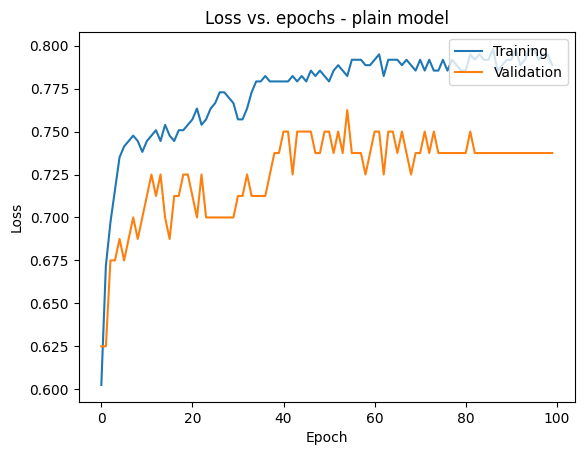

In [12]:
#Wyświetl wykres uczenia - dokładność na zbiorze treningowym
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Loss vs. epochs - plain model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Zadania do wykonania w ramach laboratorium:
    

1. Zbuduj większą sieć i wytrenuj. Porównaj wyniki z siecią podaną wyżej za pomocą wykresów (np.: różnicy). Wyświetl również wnioski jakie płyną z wykonanej analizy.

 2. Wytrenuj obydwie sieci z wykorzystaniem algorytmu adam oraz sgd. Wykonaj analizę porównawczą i wykonaj dyskusję na ich temat.

3. Porównaj dokładność na zbiorze walidacyjnym/testowym z algorytmem KNN.

4. Czy większe sieci zawsze zwracają dokładniejsze wyniki? Uzasadnij pokazując wyniki uczenia dla różnych sieci i wyświetl wyniki w celu ich analizy.